In [217]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 150)

In [218]:
df = pd.read_csv('binn.csv')
df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [219]:
df = df.sort_values(by='Date')

In [220]:
df

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0
17153,USC00207320,2005-01-01,TMAX,150
17155,USC00207320,2005-01-01,TMIN,-11
10079,USW00014833,2005-01-01,TMIN,-44
10073,USW00014833,2005-01-01,TMAX,33
...,...,...,...,...
45691,USC00200032,2015-12-31,TMAX,11
10573,USC00205050,2015-12-31,TMIN,-17
21088,USC00208202,2015-12-31,TMAX,0
10253,USC00201250,2015-12-31,TMIN,-6


In [221]:
df1 = df[(df['Date'] >= '2005-01-01') & (df['Date'] < '2015-01-01')]
df1

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0
17153,USC00207320,2005-01-01,TMAX,150
17155,USC00207320,2005-01-01,TMIN,-11
10079,USW00014833,2005-01-01,TMIN,-44
10073,USW00014833,2005-01-01,TMAX,33
...,...,...,...,...
61837,USC00202308,2014-12-31,TMIN,-100
45478,USC00205563,2014-12-31,TMAX,-28
46667,USC00205451,2014-12-31,TMIN,-111
45477,USC00205563,2014-12-31,TMIN,-117


In [222]:
print(df1['Date'].min())
print(df1['Date'].max())

2005-01-01
2014-12-31


In [223]:
year2015 = df[df['Date'] >= '2015-01-01']
year2015['Date'].min()

'2015-01-01'

In [224]:
df1['Date'] = pd.to_datetime(df1['Date'])

<ipython-input-224-695a7991ba53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'])


In [225]:
df1['Months'] = pd.DatetimeIndex(df1['Date']).month
df1['Days'] = pd.DatetimeIndex(df1['Date']).day
df1

<ipython-input-225-b0c9c3dcc3a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Months'] = pd.DatetimeIndex(df1['Date']).month
<ipython-input-225-b0c9c3dcc3a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Days'] = pd.DatetimeIndex(df1['Date']).day


,ID,Date,Element,Data_Value,Months,Days
60995,USW00004848,2005-01-01,TMIN,0,1,1
17153,USC00207320,2005-01-01,TMAX,150,1,1
17155,USC00207320,2005-01-01,TMIN,-11,1,1
10079,USW00014833,2005-01-01,TMIN,-44,1,1
10073,USW00014833,2005-01-01,TMAX,33,1,1
...,...,...,...,...,...,...
61837,USC00202308,2014-12-31,TMIN,-100,12,31
45478,USC00205563,2014-12-31,TMAX,-28,12,31
46667,USC00205451,2014-12-31,TMIN,-111,12,31
45477,USC00205563,2014-12-31,TMIN,-117,12,31


In [226]:
group_max = df1.groupby(['Months','Days']).max()
group_min =df1.groupby(['Months', 'Days']).min()

In [227]:
group_max

ID       Date Element  Data_Value
Months Days                                            
1      1     USW00094889 2014-01-01    TMIN         156
       2     USW00094889 2014-01-02    TMIN         139
       3     USW00094889 2014-01-03    TMIN         133
       4     USW00094889 2014-01-04    TMIN         106
       5     USW00094889 2014-01-05    TMIN         128
...                  ...        ...     ...         ...
12     27    USW00094889 2014-12-27    TMIN         189
       28    USW00094889 2014-12-28    TMIN         194
       29    USW00094889 2014-12-29    TMIN         128
       30    USW00094889 2014-12-30    TMIN         117
       31    USW00094889 2014-12-31    TMIN         139

[366 rows x 4 columns]

In [228]:
group_min

ID       Date Element  Data_Value
Months Days                                            
1      1     USC00200032 2005-01-01    TMAX        -160
       2     USC00200032 2005-01-02    TMAX        -267
       3     USC00200032 2005-01-03    TMAX        -267
       4     USC00200032 2005-01-04    TMAX        -261
       5     USC00200032 2005-01-05    TMAX        -150
...                  ...        ...     ...         ...
12     27    USC00200032 2005-12-27    TMAX        -138
       28    USC00200032 2005-12-28    TMAX        -166
       29    USC00200032 2005-12-29    TMAX        -150
       30    USC00200032 2005-12-30    TMAX        -144
       31    USC00200032 2005-12-31    TMAX        -150

[366 rows x 4 columns]

In [229]:
group_max = group_max.reset_index()
group_min = group_min.reset_index()

In [230]:
group_max = group_max.drop(group_max[(group_max['Days']==29) & (group_max['Months'] == 2)].index)
group_min = group_min.drop(group_min[(group_min['Days']==29) & (group_min['Months'] == 2)].index)
group_max

,Months,Days,ID,Date,Element,Data_Value
0,1,1,USW00094889,2014-01-01,TMIN,156
1,1,2,USW00094889,2014-01-02,TMIN,139
2,1,3,USW00094889,2014-01-03,TMIN,133
3,1,4,USW00094889,2014-01-04,TMIN,106
4,1,5,USW00094889,2014-01-05,TMIN,128
...,...,...,...,...,...,...
361,12,27,USW00094889,2014-12-27,TMIN,189
362,12,28,USW00094889,2014-12-28,TMIN,194
363,12,29,USW00094889,2014-12-29,TMIN,128
364,12,30,USW00094889,2014-12-30,TMIN,117


In [231]:
group_max = group_max.reset_index()
group_min = group_min.reset_index()

In [232]:
year2015['Date'] = pd.to_datetime(year2015['Date'])
year2015_max = year2015.groupby(['Date']).max()
year2015_min = year2015.groupby(['Date']).min()

<ipython-input-232-e99a64630ba7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2015['Date'] = pd.to_datetime(year2015['Date'])


In [233]:
year2015_max

,ID,Element,Data_Value
Date,,,
2015-01-01,USW00094889,TMIN,11
2015-01-02,USW00094889,TMIN,39
2015-01-03,USW00014853,TMIN,39
2015-01-04,USW00094889,TMIN,44
2015-01-05,USW00094889,TMIN,28
...,...,...,...
2015-12-27,USW00094889,TMIN,83
2015-12-28,USW00094889,TMIN,61
2015-12-29,USW00094889,TMIN,100


In [234]:
year2015_min

,ID,Element,Data_Value
Date,,,
2015-01-01,USC00200032,TMAX,-133
2015-01-02,USC00200032,TMAX,-122
2015-01-03,USC00200032,TMAX,-67
2015-01-04,USC00200032,TMAX,-88
2015-01-05,USC00200032,TMAX,-155
...,...,...,...
2015-12-27,USC00200032,TMAX,-6
2015-12-28,USC00200032,TMAX,-39
2015-12-29,USC00200032,TMAX,-39


In [235]:
year2015_max = year2015_max.reset_index()
year2015_min = year2015_min.reset_index()

In [236]:
high = year2015_max[year2015_max['Data_Value'] > group_max['Data_Value']]

In [237]:
low = year2015_min[year2015_min['Data_Value'] < group_min['Data_Value']]

In [238]:
high

,Date,ID,Element,Data_Value
39,2015-02-09,USW00094889,TMIN,83
106,2015-04-17,USW00094889,TMIN,278
126,2015-05-07,USW00094889,TMIN,306
127,2015-05-08,USW00094889,TMIN,333
130,2015-05-11,USW00094889,TMIN,306
137,2015-05-18,USW00094889,TMIN,317
207,2015-07-27,USW00094889,TMIN,339
209,2015-07-29,USW00094889,TMIN,361
230,2015-08-19,USW00094889,TMIN,328
249,2015-09-07,USW00094889,TMIN,350


In [239]:
high['Date'].unique

<bound method Series.unique of 39    2015-02-09
106   2015-04-17
126   2015-05-07
127   2015-05-08
130   2015-05-11
137   2015-05-18
207   2015-07-27
209   2015-07-29
230   2015-08-19
249   2015-09-07
250   2015-09-08
258   2015-09-16
259   2015-09-17
260   2015-09-18
270   2015-09-28
271   2015-09-29
292   2015-10-20
305   2015-11-02
306   2015-11-03
307   2015-11-04
308   2015-11-05
309   2015-11-06
321   2015-11-18
340   2015-12-07
341   2015-12-08
342   2015-12-09
343   2015-12-10
344   2015-12-11
345   2015-12-12
346   2015-12-13
347   2015-12-14
348   2015-12-15
349   2015-12-16
356   2015-12-23
357   2015-12-24
358   2015-12-25
359   2015-12-26
Name: Date, dtype: datetime64[ns]>

In [240]:
low['Date'].unique

<bound method Series.unique of 4     2015-01-05
10    2015-01-11
33    2015-02-03
44    2015-02-14
45    2015-02-15
46    2015-02-16
47    2015-02-17
49    2015-02-19
50    2015-02-20
51    2015-02-21
53    2015-02-23
54    2015-02-24
55    2015-02-25
56    2015-02-26
57    2015-02-27
58    2015-02-28
63    2015-03-05
64    2015-03-06
65    2015-03-07
86    2015-03-28
87    2015-03-29
88    2015-03-30
113   2015-04-24
114   2015-04-25
139   2015-05-20
183   2015-07-03
239   2015-08-28
289   2015-10-17
290   2015-10-18
291   2015-10-19
292   2015-10-20
313   2015-11-10
Name: Date, dtype: datetime64[ns]>

In [241]:
xticks = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

In [242]:
%matplotlib notebook

import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


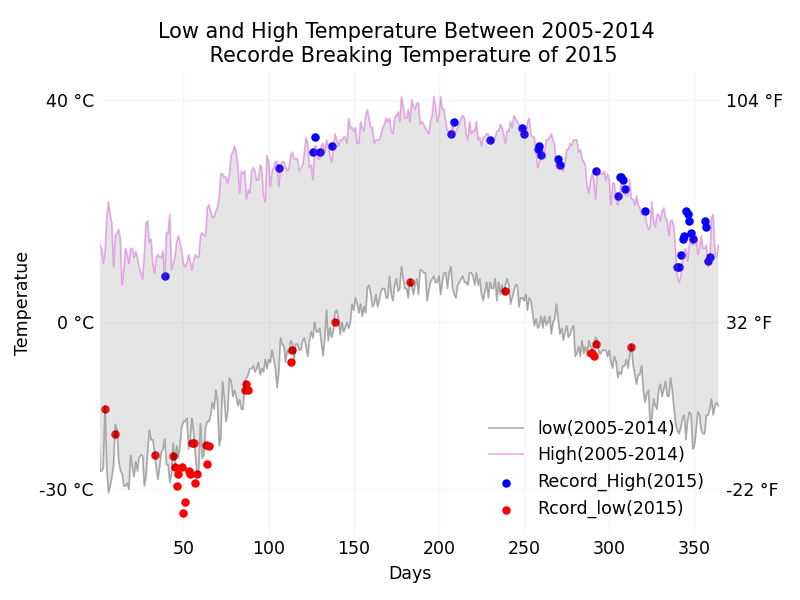

In [244]:
ax1 = plt.gca()
ax2 = ax1.twinx()

plt.scatter(high.index, high['Data_Value'], color = 'b', s = 15)
plt.scatter(low.index, low['Data_Value'], color = 'r', s = 15)

ax2.plot(group_min['Data_Value'], '-', color = 'k', alpha = 0.3, linewidth = 1)
ax2.plot(group_max['Data_Value'], '-', color = 'm', alpha = 0.3, linewidth = 1)
ax2.fill_between(group_min.index, group_min['Data_Value'], group_max['Data_Value'], facecolor = 'grey', alpha = 0.2)


ax2.set_xlim(1,365)
ax2.set_title('Low and High Temperature Between 2005-2014 \n Recorde Breaking Temperature of 2015')


axlim = ax1.set_ylim(-380,450)
yticks = pd.Series([-300,0,400])
ax1.set_yticks(yticks)
ylabels = pd.Series(yticks/10).astype(int).astype(str) + ' °C'
ax1.set_yticklabels(ylabels)

ax2.set_ylim(axlim)
ax2.set_yticks(yticks)
ylabels2 = (yticks/10 * 1.8 + 32).astype(int)
ylabels2 = pd.Series(ylabels2).astype(int).astype(str) + " °F"
ax2.set_yticklabels(ylabels2)



ax1.grid(True, alpha = 0.1)


for spine in ax2.spines:
    ax2.spines[spine].set_visible(False)
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
    
    
ax1.tick_params(axis = u'both', which = u'both', length = 0)
ax2.tick_params(axis = u'both', which = u'both', length = 0)

    
    

ax1.set_ylabel("Temperatue", alpha = 1)
ax1.set_xlabel("Days", alpha = 1)

plt.legend(loc=4,labels = ['low(2005-2014)','High(2005-2014)', 'Record_High(2015)', 'Rcord_low(2015)'], frameon = False)
